In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/A1-boston.txt", header=None, delimiter=r'\s+')
df_processed = df.copy()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
len(df)

506

We have more than 400 patterns and more than 6 features

Let's check for missing values

In [4]:
df.isnull().sum()
# so there are no missing values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

There are no missing values.
Let's check the types of the data columns

In [5]:
df.dtypes

0     float64
1     float64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8       int64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

There are also no categorical values. The values that we have are continues

#### Unfortunatelly, the dataset contains no columns names, but the full description of data fields can be found [by this link (number 10)](https://machinelearningmastery.com/standard-machine-learning-datasets/)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: >, <Axes: >]], dtype=object)

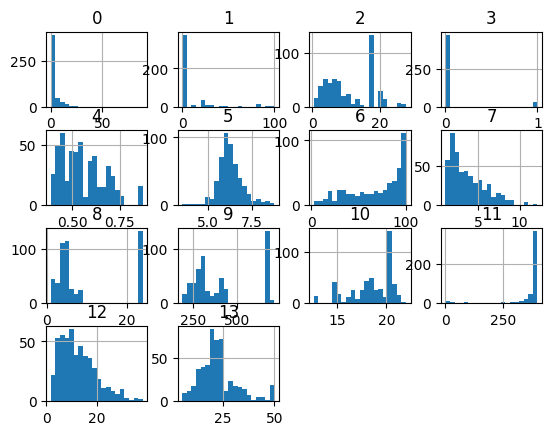

In [6]:
df.hist(bins=20)

#### Using such fast hist plot we can see that values 0, 11 and 1 have some kind of outliers. Let's look at them closer

<Axes: >

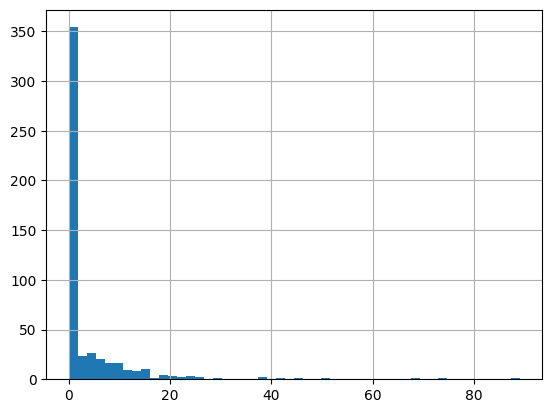

In [7]:
df[0].hist(bins=50)

In [8]:
(df[0] > 30).sum()

8

#### The crime index (column 0) seems to be underrepresented for values over 30. However, this seems pretty naturally, as it is unlikely that the crime index is so high for many towns, so these are likely to be not just bad values. However, if we keep them, it may happen that after normalization or standartization, most of values will be shrinked into a very small interval. Let's try to make it better

<Axes: >

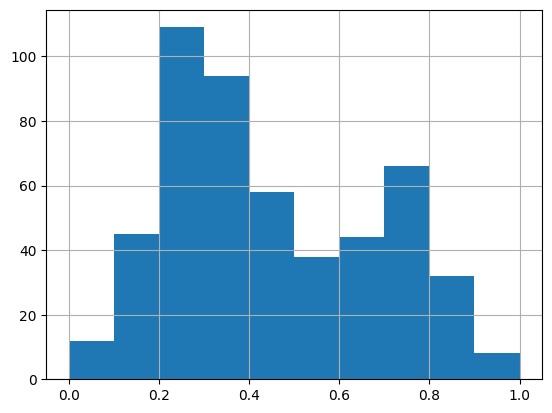

In [9]:
processed_0 = np.log2(df[0])
df_processed[0] = (processed_0 - processed_0.min()) / (processed_0.max() - processed_0.min())
df_processed[0].hist()

#### Now we solved the problem of a lot of data points being in a tiny interval close to 0, and some being very far from it. We also normalize the values now to have the column completely processed.
This kind of operation also seems to be pretty natural when we think of something subjective, like a price. Meaning that increase in 1 point of the crime index for values close to 0 (e.g. from 0.5 to 1.5) is a huge difference, while, for example, increase from 80 to 81 is not a big difference in the minds of people

372


<Axes: >

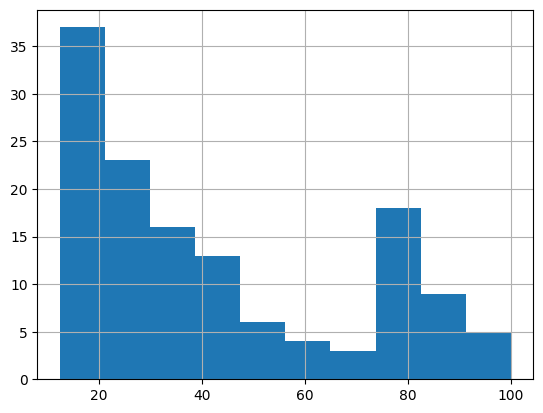

In [10]:
print((df[1] == 0).sum())
df[1][df[1] != 0].hist()

#### Column 1 has a lot of zeroes. This does not look like invalid data too, as we can see from the description of this column. Because we have a lot of zeros, and not values close to zero, we can normalize the data without risks

In [11]:
df_processed[1] = (df[1] - df[1].min()) / (df[1].max() - df[1].min())

<Axes: >

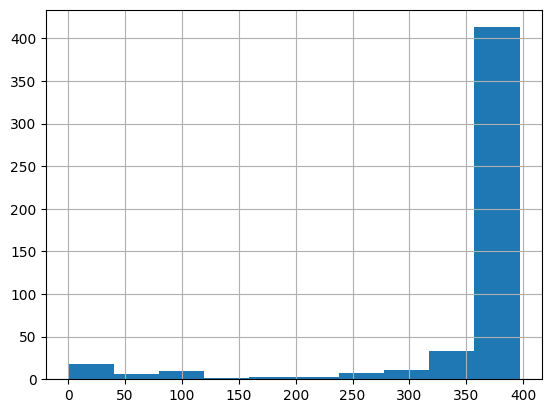

In [12]:
df[11].hist()

#### A very similar situation is with the column 11. A lot of data is in a small range, while we have some values far from that range. Let's firstly "reverse" the data (swap maximum and minimum), and apply the same logarithm here

<Axes: >

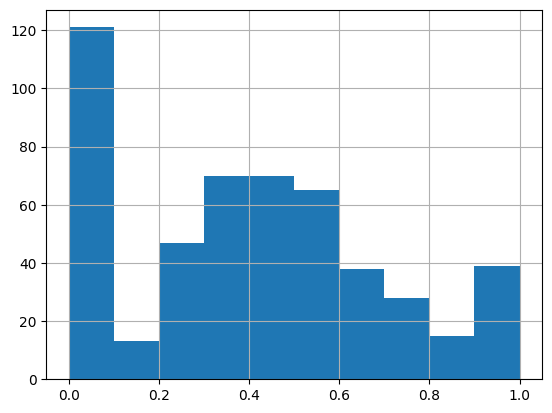

In [13]:
df_processed[11] = np.log2(-df[11] + df[11].min() + df[11].max())
df_processed[11] = (df_processed[11] -df_processed[11].min()) / (df_processed[11].max() - df_processed[11].min())
df_processed[11].hist()

Since the other columns are not outliers we would scale tham form 0 to 1.

In [14]:
df_processed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.18,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,0.000000,4.98,24.0
1,0.153211,0.00,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,0.000000,9.14,21.6
2,0.153134,0.00,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,0.367643,4.03,34.7
3,0.171005,0.00,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,0.293564,2.94,33.4
4,0.250315,0.00,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,0.000000,5.33,36.2


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler_Normalisation = MinMaxScaler()

# the columns 0,1,11 are normalized from 0 to 1 and the columns are equal in df_processed and df(orginal value where data is puted in)
normalized_data  = scaler_Normalisation.fit_transform(df_processed)



In [16]:
df_processed_all = pd.DataFrame(normalized_data)
# take a look at the data
df_processed_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.000000,0.089680,0.422222
1,0.153211,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.000000,0.204470,0.368889
2,0.153134,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.367643,0.063466,0.660000
3,0.171005,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.293564,0.033389,0.631111
4,0.250315,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.000000,0.099338,0.693333


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: >, <Axes: >]], dtype=object)

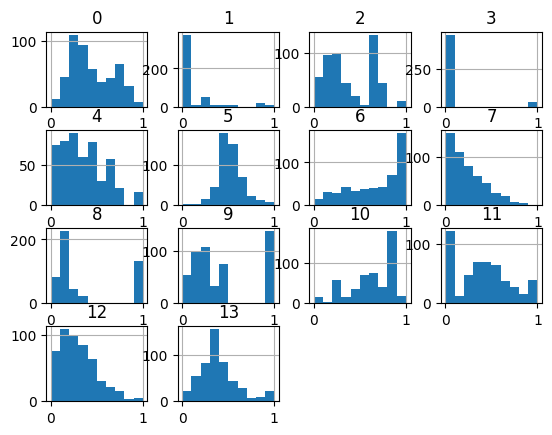

In [17]:
df_processed_all.hist()

In [18]:
df.to_csv("processed_datasets/boston.csv", index=False)